# **Import Libraries**

In [1]:
import pandas as pd # Database management
import numpy as np
import re # Regular Expressions
import emoji
import emot
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from collections import Counter
import stylecloud
from IPython.display import Image # Display word cloud image
from stop_words import get_stop_words # Stop words for several languages
from sentiment_analysis_spanish import sentiment_analysis

# **Data**

In [2]:
df = pd.read_table("chat.txt", header = None, on_bad_lines = "warn", names = ["text"])
df

C:\Users\acast\AppData\Local\Temp\ipykernel_20660\2745178798.py:1: ParserWarning: Skipping line 37236: expected 1 fields, saw 2
Skipping line 37237: expected 1 fields, saw 2
Skipping line 37238: expected 1 fields, saw 2
Skipping line 37239: expected 1 fields, saw 2
Skipping line 37240: expected 1 fields, saw 2
Skipping line 39691: expected 1 fields, saw 2
Skipping line 41824: expected 1 fields, saw 4

  df = pd.read_table("chat.txt", header = None, on_bad_lines = "warn", names = ["text"])


,text
0,"11/30/20, 8:01 PM - Alejandro Castellanos: <Me..."
1,"11/30/20, 8:01 PM - Alejandro Castellanos: <Me..."
2,"11/30/20, 8:01 PM - Alejandro Castellanos: <Me..."
3,"11/30/20, 8:01 PM - Alejandro Castellanos: <Me..."
4,"11/30/20, 8:01 PM - Alejandro Castellanos: Te ..."
...,...
71450,"2/14/24, 10:32 AM - Coneja Bebé 🐰: Me haces un..."
71451,"2/14/24, 10:32 AM - Coneja Bebé 🐰: Fecha de ho..."
71452,"2/14/24, 10:34 AM - Alejandro Castellanos: Wed..."
71453,"February 14, 2024"


# **Data Wrangling**

In [3]:
# # Deleted Messages
df = df[~df["text"].str.contains("This message was deleted")]

# Delete all rows with "Media omitted" Message
df = df[~df["text"].str.contains("Media omitted")]

# Delete row with line breaks or without time data, string patter "M - " such as "PM - " or "AM - "
df = df[df["text"].str.contains("M - ")]

df

,text
4,"11/30/20, 8:01 PM - Alejandro Castellanos: Te ..."
5,"11/30/20, 8:03 PM - Coneja Bebé 🐰: 🐇🐇🐇🐇🐇🐇🐇"
6,"11/30/20, 8:08 PM - Coneja Bebé 🐰: 😘"
7,"11/30/20, 8:08 PM - Coneja Bebé 🐰: Más amor co..."
9,"11/30/20, 8:17 PM - Coneja Bebé 🐰: 😘😘😘"
...,...
71449,"2/14/24, 10:32 AM - Coneja Bebé 🐰: Sipo"
71450,"2/14/24, 10:32 AM - Coneja Bebé 🐰: Me haces un..."
71451,"2/14/24, 10:32 AM - Coneja Bebé 🐰: Fecha de ho..."
71452,"2/14/24, 10:34 AM - Alejandro Castellanos: Wed..."


In [4]:
# Split the data
df = df["text"].str.split(" - ", expand = True)

df

,0,1,2
4,"11/30/20, 8:01 PM",Alejandro Castellanos: Te quiero conejita,None
5,"11/30/20, 8:03 PM",Coneja Bebé 🐰: 🐇🐇🐇🐇🐇🐇🐇,None
6,"11/30/20, 8:08 PM",Coneja Bebé 🐰: 😘,None
7,"11/30/20, 8:08 PM",Coneja Bebé 🐰: Más amor como de conejo,None
9,"11/30/20, 8:17 PM",Coneja Bebé 🐰: 😘😘😘,None
...,...,...,...
71449,"2/14/24, 10:32 AM",Coneja Bebé 🐰: Sipo,None
71450,"2/14/24, 10:32 AM",Coneja Bebé 🐰: Me haces un favor,None
71451,"2/14/24, 10:32 AM",Coneja Bebé 🐰: Fecha de hoy en ingles,None
71452,"2/14/24, 10:34 AM",Alejandro Castellanos: Wednesday,None


In [5]:
df[[1, 2, 3, 4]] = df[1].str.split(": ", expand  = True)
df

,0,1,2,3,4
4,"11/30/20, 8:01 PM",Alejandro Castellanos,Te quiero conejita,None,None
5,"11/30/20, 8:03 PM",Coneja Bebé 🐰,🐇🐇🐇🐇🐇🐇🐇,None,None
6,"11/30/20, 8:08 PM",Coneja Bebé 🐰,😘,None,None
7,"11/30/20, 8:08 PM",Coneja Bebé 🐰,Más amor como de conejo,None,None
9,"11/30/20, 8:17 PM",Coneja Bebé 🐰,😘😘😘,None,None
...,...,...,...,...,...
71449,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Sipo,None,None
71450,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Me haces un favor,None,None
71451,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Fecha de hoy en ingles,None,None
71452,"2/14/24, 10:34 AM",Alejandro Castellanos,Wednesday,None,None


In [6]:
df.fillna("", inplace = True)
df[5] = df[2] + " " +df[3] + " "+ df [4]
df

,0,1,2,3,4,5
4,"11/30/20, 8:01 PM",Alejandro Castellanos,Te quiero conejita,,,Te quiero conejita
5,"11/30/20, 8:03 PM",Coneja Bebé 🐰,🐇🐇🐇🐇🐇🐇🐇,,,🐇🐇🐇🐇🐇🐇🐇
6,"11/30/20, 8:08 PM",Coneja Bebé 🐰,😘,,,😘
7,"11/30/20, 8:08 PM",Coneja Bebé 🐰,Más amor como de conejo,,,Más amor como de conejo
9,"11/30/20, 8:17 PM",Coneja Bebé 🐰,😘😘😘,,,😘😘😘
...,...,...,...,...,...,...
71449,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Sipo,,,Sipo
71450,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Me haces un favor,,,Me haces un favor
71451,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Fecha de hoy en ingles,,,Fecha de hoy en ingles
71452,"2/14/24, 10:34 AM",Alejandro Castellanos,Wednesday,,,Wednesday


In [7]:
# Keep only the user, message and date columns
df.drop([2, 3, 4], axis = 1, inplace = True)
df

,0,1,5
4,"11/30/20, 8:01 PM",Alejandro Castellanos,Te quiero conejita
5,"11/30/20, 8:03 PM",Coneja Bebé 🐰,🐇🐇🐇🐇🐇🐇🐇
6,"11/30/20, 8:08 PM",Coneja Bebé 🐰,😘
7,"11/30/20, 8:08 PM",Coneja Bebé 🐰,Más amor como de conejo
9,"11/30/20, 8:17 PM",Coneja Bebé 🐰,😘😘😘
...,...,...,...
71449,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Sipo
71450,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Me haces un favor
71451,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Fecha de hoy en ingles
71452,"2/14/24, 10:34 AM",Alejandro Castellanos,Wednesday


In [8]:
# Change the name of the users
df[1] = df[1].apply(lambda x: "A" if "Alejandro" in x else "L")
df

,0,1,5
4,"11/30/20, 8:01 PM",A,Te quiero conejita
5,"11/30/20, 8:03 PM",L,🐇🐇🐇🐇🐇🐇🐇
6,"11/30/20, 8:08 PM",L,😘
7,"11/30/20, 8:08 PM",L,Más amor como de conejo
9,"11/30/20, 8:17 PM",L,😘😘😘
...,...,...,...
71449,"2/14/24, 10:32 AM",L,Sipo
71450,"2/14/24, 10:32 AM",L,Me haces un favor
71451,"2/14/24, 10:32 AM",L,Fecha de hoy en ingles
71452,"2/14/24, 10:34 AM",A,Wednesday


In [9]:
# Change name of the columns
df.columns = ["Complete Date", "User", "Message"]
df

,Complete Date,User,Message
4,"11/30/20, 8:01 PM",A,Te quiero conejita
5,"11/30/20, 8:03 PM",L,🐇🐇🐇🐇🐇🐇🐇
6,"11/30/20, 8:08 PM",L,😘
7,"11/30/20, 8:08 PM",L,Más amor como de conejo
9,"11/30/20, 8:17 PM",L,😘😘😘
...,...,...,...
71449,"2/14/24, 10:32 AM",L,Sipo
71450,"2/14/24, 10:32 AM",L,Me haces un favor
71451,"2/14/24, 10:32 AM",L,Fecha de hoy en ingles
71452,"2/14/24, 10:34 AM",A,Wednesday


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62754 entries, 4 to 71454
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Complete Date  62754 non-null  object
 1   User           62754 non-null  object
 2   Message        62754 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


In [11]:
# Set Date column with  datetime format
df["Complete Date"] = pd.to_datetime(df["Complete Date"])

df.info()

C:\Users\acast\AppData\Local\Temp\ipykernel_20660\3430094583.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Complete Date"] = pd.to_datetime(df["Complete Date"])


<class 'pandas.core.frame.DataFrame'>
Index: 62754 entries, 4 to 71454
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Complete Date  62754 non-null  datetime64[ns]
 1   User           62754 non-null  object        
 2   Message        62754 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.9+ MB


In [12]:
def modify_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text) # Messages with URL
    text = re.sub(r"[0-9]+","", text) # Remove Numbers
    text = re.sub(r"\s+"," ", text) # Remove Messages with several spaces
    text = re.sub(r"[^\w\s]|_", "", text) # Remove special characters
    text = re.sub(r"([a-zA-Z])\1\1","\\1", text) # remove repeated letters
    return text

In [13]:
df["Message_Modified"] =  df["Message"].apply(modify_text)
df

,Complete Date,User,Message,Message_Modified
4,2020-11-30 20:01:00,A,Te quiero conejita,te quiero conejita
5,2020-11-30 20:03:00,L,🐇🐇🐇🐇🐇🐇🐇,
6,2020-11-30 20:08:00,L,😘,
7,2020-11-30 20:08:00,L,Más amor como de conejo,más amor como de conejo
9,2020-11-30 20:17:00,L,😘😘😘,
...,...,...,...,...
71449,2024-02-14 10:32:00,L,Sipo,sipo
71450,2024-02-14 10:32:00,L,Me haces un favor,me haces un favor
71451,2024-02-14 10:32:00,L,Fecha de hoy en ingles,fecha de hoy en ingles
71452,2024-02-14 10:34:00,A,Wednesday,wednesday


In [14]:
emot_obj = emot.emot()

df["Message"].apply(lambda x: "" if re.compile(r"http\S+").search(x) else "".join(emot_obj.emoticons(x)["value"])
                    ).value_counts().rename_axis("emoticon").reset_index(name="count").query("emoticon != ' '")[["emoticon"]]


,emoticon
0,
1,:3
2,:(
3,:P
4,:)
5,oO
6,:|
7,:3:3
8,=3
9,:o


In [15]:
df["Message"] = df["Message"].replace({":3": "😊", 
                                       ":\(": "🙁",
                                       ":P": "😋",
                                       ":\)": "😊",
                                       "oO": "🤪",
                                       ":\|": "😐",
                                       ":3:3": "😊",
                                       "=3": "😊",
                                       ":o": "😮",
                                       ":3:P": "😋"}, regex=True)

In [16]:
df

,Complete Date,User,Message,Message_Modified
4,2020-11-30 20:01:00,A,Te quiero conejita,te quiero conejita
5,2020-11-30 20:03:00,L,🐇🐇🐇🐇🐇🐇🐇,
6,2020-11-30 20:08:00,L,😘,
7,2020-11-30 20:08:00,L,Más amor como de conejo,más amor como de conejo
9,2020-11-30 20:17:00,L,😘😘😘,
...,...,...,...,...
71449,2024-02-14 10:32:00,L,Sipo,sipo
71450,2024-02-14 10:32:00,L,Me haces un favor,me haces un favor
71451,2024-02-14 10:32:00,L,Fecha de hoy en ingles,fecha de hoy en ingles
71452,2024-02-14 10:34:00,A,Wednesday,wednesday


In [17]:
# emoji extraction
df["Emoji"] = df["Message"].apply(lambda x: "".join(c for c in x if c in emoji.EMOJI_DATA))
df

,Complete Date,User,Message,Message_Modified,Emoji
4,2020-11-30 20:01:00,A,Te quiero conejita,te quiero conejita,
5,2020-11-30 20:03:00,L,🐇🐇🐇🐇🐇🐇🐇,,🐇🐇🐇🐇🐇🐇🐇
6,2020-11-30 20:08:00,L,😘,,😘
7,2020-11-30 20:08:00,L,Más amor como de conejo,más amor como de conejo,
9,2020-11-30 20:17:00,L,😘😘😘,,😘😘😘
...,...,...,...,...,...
71449,2024-02-14 10:32:00,L,Sipo,sipo,
71450,2024-02-14 10:32:00,L,Me haces un favor,me haces un favor,
71451,2024-02-14 10:32:00,L,Fecha de hoy en ingles,fecha de hoy en ingles,
71452,2024-02-14 10:34:00,A,Wednesday,wednesday,


In [18]:
df["Date"] = df["Complete Date"].dt.date.astype("datetime64[ns]")
df["Month"] = df["Complete Date"].dt.month_name()
df["Day"] = df["Complete Date"].dt.day
df["Day_Week"] = df["Complete Date"].dt.day_name()
df["Hour"] = df["Complete Date"].dt.hour

df

,Complete Date,User,Message,Message_Modified,Emoji,Date,Month,Day,Day_Week,Hour
4,2020-11-30 20:01:00,A,Te quiero conejita,te quiero conejita,,2020-11-30,November,30,Monday,20
5,2020-11-30 20:03:00,L,🐇🐇🐇🐇🐇🐇🐇,,🐇🐇🐇🐇🐇🐇🐇,2020-11-30,November,30,Monday,20
6,2020-11-30 20:08:00,L,😘,,😘,2020-11-30,November,30,Monday,20
7,2020-11-30 20:08:00,L,Más amor como de conejo,más amor como de conejo,,2020-11-30,November,30,Monday,20
9,2020-11-30 20:17:00,L,😘😘😘,,😘😘😘,2020-11-30,November,30,Monday,20
...,...,...,...,...,...,...,...,...,...,...
71449,2024-02-14 10:32:00,L,Sipo,sipo,,2024-02-14,February,14,Wednesday,10
71450,2024-02-14 10:32:00,L,Me haces un favor,me haces un favor,,2024-02-14,February,14,Wednesday,10
71451,2024-02-14 10:32:00,L,Fecha de hoy en ingles,fecha de hoy en ingles,,2024-02-14,February,14,Wednesday,10
71452,2024-02-14 10:34:00,A,Wednesday,wednesday,,2024-02-14,February,14,Wednesday,10


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62754 entries, 4 to 71454
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Complete Date     62754 non-null  datetime64[ns]
 1   User              62754 non-null  object        
 2   Message           62754 non-null  object        
 3   Message_Modified  62754 non-null  object        
 4   Emoji             62754 non-null  object        
 5   Date              62754 non-null  datetime64[ns]
 6   Month             62754 non-null  object        
 7   Day               62754 non-null  int32         
 8   Day_Week          62754 non-null  object        
 9   Hour              62754 non-null  int32         
dtypes: datetime64[ns](2), int32(2), object(6)
memory usage: 4.8+ MB


# **EDA**

## *User Interaction*

#### Who has sent the highest number of messages?

In [20]:
px.bar(pd.DataFrame(df["User"].value_counts()).reset_index(), 
             x = "User", 
             y = "count",
             color = "User",
             title = "Total Number of Message per User")

#### Messages through time

In [21]:
px.line(pd.DataFrame(df["Date"].value_counts().sort_index()).reset_index(),
        x = "Date",
        y = "count",
        title = "Messages per Day",
        color_discrete_sequence = ["#8E44AD"])

In [22]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
pd.DataFrame(df["Month"].value_counts().reindex(months, axis=0).reset_index())

,Month,count
0,January,6296
1,February,4286
2,March,3112
3,April,3776
4,May,6842
5,June,6132
6,July,4816
7,August,4020
8,September,3645
9,October,3539


In [23]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

px.bar(pd.DataFrame(df["Month"].value_counts().reindex(months, axis=0).reset_index()), 
             x = "Month", 
             y = "count",
             title = "Messages per Month",
             color_discrete_sequence = ["#52BE80"])

In [24]:
fig = px.line(pd.DataFrame(df["Day"].value_counts().reset_index().sort_values(by = ["Day"])), 
             x = "Day", 
             y = "count",
             title = "Messages per Days of the Month",
             color_discrete_sequence = ["#CD6155"],
             markers =  True)

fig.update_layout(xaxis = dict(tickmode = "linear", tick0 = 1, dtick = 1))
fig.update_xaxes(range = [1, 31])

In [25]:
day_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

px.bar(pd.DataFrame(df["Day_Week"].value_counts().reindex(day_week, axis=0).reset_index()), 
             x = "Day_Week", 
             y = "count",
             title = "Messages per Days of the Week",
             color_discrete_sequence = ["#E67E22"])

In [26]:
fig = px.line(pd.DataFrame(df["Hour"].value_counts().reset_index().sort_values(by = ["Hour"])), 
             x = "Hour", 
             y = "count",
             title = "Messages per Hour",
             color_discrete_sequence = ["#3498DB"],
             markers =  True)
             


fig.update_layout(xaxis = dict(tickmode = "linear", tick0 = 1, dtick = 1))
fig.update_xaxes(range = [0, 23])

In [27]:

pivot = pd.pivot_table(df, index = "Hour", columns="Day_Week", values="Message", aggfunc="count").fillna(0)
heatmap = go.Heatmap(z = pivot.values,
                     x = pivot.columns,
                     y = pivot.index,
                     hovertemplate = "Interventions at %{y}-hour<extra>%{z}</extra>",
                     colorscale = "Oranges")

fig = go.Figure(data = [heatmap])

fig.update_layout(title = "Heat Map: Day of the Week vs. Hour of the Day",
                  xaxis={"categoryorder": "array",
                         "categoryarray": ["Monday", 
                                           "Tuesday", 
                                           "Wednesday",
                                           "Thursday", 
                                           "Friday", 
                                           "Saturday", 
                                           "Sunday"]})

fig.show()

In [28]:
df.groupby("User").agg({"Emoji": lambda x: " ".join(set(emoji for emojis in x.dropna() for emoji in emojis))}).assign(Quantity = [len(df[df["Emoji"] != ""][["User", "Emoji"]].groupby("User").sum().iloc[0,0]), 
                                                                                                                                  len(df[df["Emoji"] != ""][["User", "Emoji"]].groupby("User").sum().iloc[1,0])])


,Emoji,Quantity
User,,
A,🐤 🐡 👨 😴 🌙 🙈 🥺 🦆 😨 😅 ❓ 😍 😖 💫 🐶 🥹 😄 🐈 🎪 🍅 🎃 🚀 🫣 ...,12255
L,🐤 🐡 🫨 💕 🔐 🛩 😴 🙈 🤚 🍎 ♾ 🥺 🦆 😨 🍼 🐱 🌵 💚 😅 ⛑ 🤥 🐇 😍 ...,9521


In [29]:
list_A = []

for emoji in "".join(df[(df["User"] == "A") & (df["Emoji"] != "")]["Emoji"]):
    list_A.append(emoji)

Counter(list_A).most_common()[:5]



[('😘', 7403), ('🥺', 1058), ('😬', 411), ('🤪', 277), ('❤', 266)]

In [30]:
list_L = []

for emoji in "".join(df[(df["User"] == "L") & (df["Emoji"] != "")]["Emoji"]):
    list_L.append(emoji)

Counter(list_L).most_common()[:5]

[('🥺', 1378), ('😘', 1111), ('🥰', 912), ('☺', 622), ('😊', 587)]

In [31]:
fig = go.Figure(data=go.Pie(labels = ["Chats without emoji", "Chats with emoji"],
                            values = df.assign(is_emoji = df["Emoji"].apply(lambda x: True if x != "" else False)).groupby("is_emoji").count()[["Message"]].reset_index()["Message"],
                            hole = 0.5, 
                            marker = dict(colors=[ "#DBB534", "#34D3DB"])))
fig.update_traces(hoverinfo = "label + value")

In [32]:
df["Number_Words"] = df["Message_Modified"].apply(lambda x: len(x.split()))
df

,Complete Date,User,Message,Message_Modified,Emoji,Date,Month,Day,Day_Week,Hour,Number_Words
4,2020-11-30 20:01:00,A,Te quiero conejita,te quiero conejita,,2020-11-30,November,30,Monday,20,3
5,2020-11-30 20:03:00,L,🐇🐇🐇🐇🐇🐇🐇,,🐇🐇🐇🐇🐇🐇🐇,2020-11-30,November,30,Monday,20,0
6,2020-11-30 20:08:00,L,😘,,😘,2020-11-30,November,30,Monday,20,0
7,2020-11-30 20:08:00,L,Más amor como de conejo,más amor como de conejo,,2020-11-30,November,30,Monday,20,5
9,2020-11-30 20:17:00,L,😘😘😘,,😘😘😘,2020-11-30,November,30,Monday,20,0
...,...,...,...,...,...,...,...,...,...,...,...
71449,2024-02-14 10:32:00,L,Sipo,sipo,,2024-02-14,February,14,Wednesday,10,1
71450,2024-02-14 10:32:00,L,Me haces un favor,me haces un favor,,2024-02-14,February,14,Wednesday,10,4
71451,2024-02-14 10:32:00,L,Fecha de hoy en ingles,fecha de hoy en ingles,,2024-02-14,February,14,Wednesday,10,5
71452,2024-02-14 10:34:00,A,Wednesday,wednesday,,2024-02-14,February,14,Wednesday,10,1


In [33]:
px.box(df[df["Number_Words"] > 0][["User", "Number_Words"]],
       x = "User",
       y = "Number_Words",
       color = "User",
       log_y=True)

stylecloud.gen_stylecloud(' '.join(chat['Message_Modified)

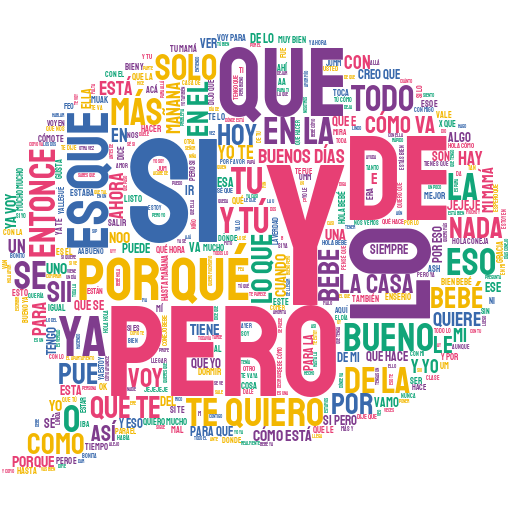

In [34]:
stylecloud.gen_stylecloud(' '.join(df["Message_Modified"]),
                          icon_name = "fas fa-comment",
                          output_name = "both.png")

Image("both.png")

In [35]:
stop_words_spanish = get_stop_words("spanish")
stop_words_spanish[:10]

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra']

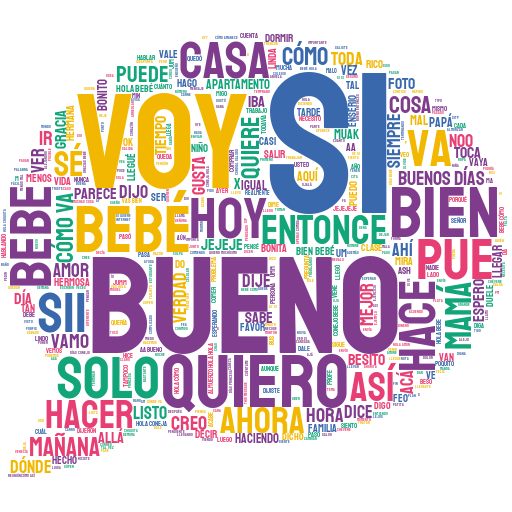

In [36]:
stylecloud.gen_stylecloud(' '.join(df["Message_Modified"]),
                          icon_name = "fas fa-comment",
                          output_name = "both+sw.png",
                          custom_stopwords = stop_words_spanish)

Image("both+sw.png")

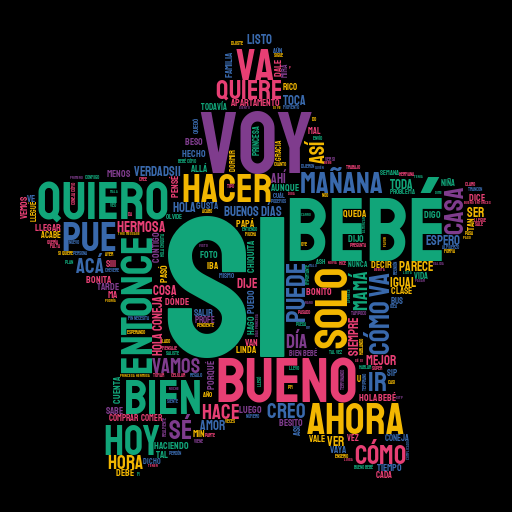

In [37]:
stylecloud.gen_stylecloud(' '.join(df[df["User"] == "A"]["Message_Modified"]),
                          icon_name = "fas fa-star",
                          output_name = "A+sw.png",
                          custom_stopwords = stop_words_spanish,
                          background_color="black")

Image("A+sw.png")

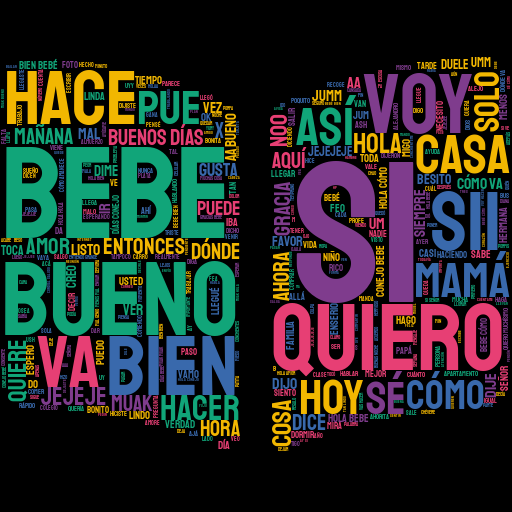

In [38]:
stylecloud.gen_stylecloud(' '.join(df[df["User"] == "L"]["Message_Modified"]),
                          icon_name = "fas fa-book-open",
                          output_name = "L+sw.png",
                          custom_stopwords = stop_words_spanish,
                          background_color="black")

Image("L+sw.png")

In [39]:
df2 = df[df["Message_Modified"] != " "][["Date", "User", "Message_Modified"]]
df2

,Date,User,Message_Modified
4,2020-11-30,A,te quiero conejita
7,2020-11-30,L,más amor como de conejo
10,2020-11-30,L,que haces
12,2020-11-30,A,programando bebé
14,2020-11-30,A,y pensandote mucho
...,...,...,...
71449,2024-02-14,L,sipo
71450,2024-02-14,L,me haces un favor
71451,2024-02-14,L,fecha de hoy en ingles
71452,2024-02-14,A,wednesday


In [40]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()


df2["Sentiment"] = df2["Message_Modified"].apply(lambda x: sentiment.sentiment(x))
df2

c:\Users\acast\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

c:\Users\acast\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



,Date,User,Message_Modified,Sentiment
4,2020-11-30,A,te quiero conejita,0.209633
7,2020-11-30,L,más amor como de conejo,0.210284
10,2020-11-30,L,que haces,0.302997
12,2020-11-30,A,programando bebé,0.388172
14,2020-11-30,A,y pensandote mucho,0.347310
...,...,...,...,...
71449,2024-02-14,L,sipo,0.497892
71450,2024-02-14,L,me haces un favor,0.070254
71451,2024-02-14,L,fecha de hoy en ingles,0.032891
71452,2024-02-14,A,wednesday,0.497892


In [41]:
px.line(df2[["Date", "Sentiment"]].groupby("Date").mean().reset_index(),
        x = "Date",
        y = "Sentiment",
        title = "Sentiment per Day",
        color_discrete_sequence = ["#8E44AD"])

In [42]:
px.line(df2[["Date", "Sentiment", "User"]].groupby(["Date", "User"]).mean().reset_index(),
        x = "Date",
        y = "Sentiment",
        title = "Sentiment per Day",
        color = "User")

In [43]:
bins = np.linspace(0, 1, 4)
bins

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [44]:
group_sentiment = ["Negative", "Neutral", "Positive"]
df2["sentiment_binned"] = pd.cut(df2["Sentiment"], bins, labels = group_sentiment, include_lowest = True)
df2

,Date,User,Message_Modified,Sentiment,sentiment_binned
4,2020-11-30,A,te quiero conejita,0.209633,Negative
7,2020-11-30,L,más amor como de conejo,0.210284,Negative
10,2020-11-30,L,que haces,0.302997,Negative
12,2020-11-30,A,programando bebé,0.388172,Neutral
14,2020-11-30,A,y pensandote mucho,0.347310,Neutral
...,...,...,...,...,...
71449,2024-02-14,L,sipo,0.497892,Neutral
71450,2024-02-14,L,me haces un favor,0.070254,Negative
71451,2024-02-14,L,fecha de hoy en ingles,0.032891,Negative
71452,2024-02-14,A,wednesday,0.497892,Neutral


In [45]:
px.pie(df2["sentiment_binned"].value_counts().reset_index(), 
       values = "count", 
       names = "sentiment_binned",
       hole = 0.5, 
       color_discrete_sequence = ["#D98880", "#F9E79F", "#A9DFBF"],
       title = "Sentiment Values Distribution")


In [46]:
fig = make_subplots(rows = 1, cols = 2, specs = [[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = ['Negative', 'Neutral', 'Positive'],
                     values = df2[df2["User"] == "A"]["sentiment_binned"].value_counts().reset_index()["count"],
                     marker = dict(colors = ["#D98880", "#F9E79F", "#A9DFBF"]),
                     title = dict(text = '<b>A</b>', font = dict(size = 16))), 1, 1)
fig.add_trace(go.Pie(labels = ['Negative', 'Neutral', 'Positive'],
                     values = df2[df2["User"] == "L"]["sentiment_binned"].value_counts().reset_index()["count"],
                     marker = dict(colors = ["#D98880", "#F9E79F", "#A9DFBF"]),
                     title = dict(text = '<b>L</b>', font = dict(size = 16))), 1, 2)

fig.update_traces(hole = 0.5, hoverinfo = 'label+value')

In [47]:
df2.to_csv("chat_to_translate.csv", index = False)

In [ ]:
df2.to_csv("chat_with_translation_es_en.csv", index = False)

In [ ]:
df2.reset_index(drop = True, inplace = True)

df2["Message_Translated"] = ""

cont_1 = 0
cont_2 = int(len(df2)/6)

while cont_2 <= len(df2):
  print(cont_1, cont_2)
  translator = Translator()
  df2["Message_Translate"].loc[cont_1:cont_2] = df2["Message_Modified"].loc[cont_1:cont_2].apply(lambda x: translator.translate(x, src = "es", dest="en").text)

  cont_1 += int(len(df)/6)
  cont_2 += int(len(df)/6)

df2

df2.to_csv("chat_with_translation_es_en.csv", index = False)

In [ ]:
df2

https://medium.com/@barklight/cracking-the-conversation-973839be5b88
https://medium.com/@edsenmichaelcy/whatsapp-message-exploratory-data-analysis-eda-538560ee1c99
https://towardsdatascience.com/analyzing-whatsapp-chats-with-python-20d62ce7fe2d

